# Proyecto Metodos Computacionales 
## Santiago Orjuela
### 10060508118
### 2021-2


In [ ]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from collections import deque
from IPython.display import Image


In [ ]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')

$\theta_1, \theta_2$ son funciones que dependel del tiempo. Entonces las definimos de la siguiente forma:

In [ ]:
θ1, θ2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

In [ ]:
θ1 = θ1(t)
θ2 = θ2(t)

Definimos sus derivadas

In [ ]:
dθ1 = smp.diff(θ1, t)
dθ2 = smp.diff(θ2, t)
d2θ1 = smp.diff(dθ1, t)
d2θ2 = smp.diff(dθ2, t)

Definimos $x_1,x_2,y_1,y_2$ en los parametros que tenemos

In [ ]:
x1 = L1*smp.sin(θ1)
y1 = -L1*smp.cos(θ1)
x2 = L1*smp.sin(θ1)+L2*smp.sin(θ2)
y2 = -L1*smp.cos(θ1)-L2*smp.cos(θ2)

Definimos la energia cinetica y potencial para obtener la lagrangiana


In [ ]:
# Cinetica
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1+T2

# Potencial
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2

# Lagrangiana
L = T-V

In [ ]:
L

L1*g*m1*cos(\theta_1(t)) - g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))) + 0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + L1**2*cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2)

Ecuaciones de movimiento de Lagrange

$\frac{\partial L}{\partial \theta_1} - \frac{d}{dt}(\frac{\partial L}{\partial \dot\theta_1})$ = 0 \\

$\frac{\partial L}{\partial \theta_2} - \frac{d}{dt}(\frac{\partial L}{\partial \dot\theta_2})$ = 0 \\

In [ ]:
LE1 = smp.diff(L, θ1) - smp.diff(smp.diff(L, dθ1), t).simplify()
LE2 = smp.diff(L, θ2) - smp.diff(smp.diff(L, dθ2), t).simplify()

Resolvemos las ecuaciones de lagrange

In [ ]:
sols = smp.solve([LE1, LE2], (d2θ1, d2θ2),
                simplify=False, rational=False)

Tenemos ahora \\
$\frac{d^2\theta_1}{dt^2} = ...$ \\
$\frac{d^2\theta_2}{dt^2} = ...$

Son ecuaciones diferenciales de segundo orden, pero en python solo podemos resolver de primer orden, pero podemos hacer lo sgiuiente

Definimos $z_1 = \frac{d\theta_1}{dt} $  y $z_2 = \frac{d\theta_2}{dt}$

Entonces tenemos que $\frac{dz_1}{dt} = \frac{d^2\theta_1}{d^t2}$ y $\frac{dz_2}{dt} = \frac{d^2\theta_2}{d^t2}$

Con esto tenemos 4 ecuaciones diferenciales de primer orden 

$\frac{dz_1}{dt} = ...$ \\
$\frac{d\theta_1}{dt} = z_1$ \\
$\frac{dz_2}{dt} = ...$ \\
$\frac{d\theta_2}{dt} = z_2$

Ahora pasamos a convertirlas en funciones numericas, ya que se encuentran en funciones simbolicas

In [ ]:
dz1dt = smp.lambdify((t,g,m1,m2,L1,L2,θ1,θ2,dθ1,dθ2),sols[d2θ1])
dz2dt = smp.lambdify((t,g,m1,m2,L1,L2,θ1,θ2,dθ1,dθ2),sols[d2θ2])
dθ1dt = smp.lambdify(dθ1,dθ1)
dθ2dt = smp.lambdify(dθ2,dθ2)

Definimos $S = (\theta_1, z_1, \theta_2, z_2)$, para luego obtener la funcion  $\frac{dS}{dt} $ debido a que los valores de S varian con el tiempo

In [ ]:
def dSdt(S, t, g, m1, m2, L1, L2):
    θ1, z1, θ2, z2 = S
    return [
        dθ1dt(z1),
        dz1dt(t, g, m1, m2, L1, L2, θ1, θ2, z1, z2),
        dθ2dt(z2),
        dz2dt(t, g, m1, m2, L1, L2, θ1, θ2, z1, z2),
    ]

Resolvemos usando Odeint

In [ ]:
t = np.linspace(0, 100, 1001)
g = 9.81
m1=2
m2=1
L1 = 2
L2 = 1
S0 = [1, -3, -1, 5]
ans = odeint(dSdt, S0, t, args=(g,m1,m2,L1,L2))

In [ ]:
ans.T

array([[  1.        ,   0.65520407,   0.17507665, ...,  -1.74551511,
         -1.90810744,  -2.06315723],
       [ -3.        ,  -4.06290099,  -4.89789289, ...,  -1.53633558,
         -1.68213042,  -1.26982081],
       [ -1.        ,  -0.36794454,   0.65751614, ..., -41.6759204 ,
        -42.40675302, -43.19648656],
       [  5.        ,   8.13329933,  10.30400114, ...,  -6.9214009 ,
         -7.7301253 ,  -7.77467172]])

Obtenemos $\theta_1(t), \theta_2$(t)

In [ ]:
θ1 = ans.T[0]
θ2 = ans.T[2]

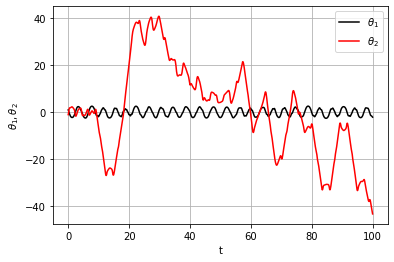

In [ ]:
plt.plot(t, θ1,'black',label = r'$\theta_1$')
plt.plot(t, θ2,'r',label = r'$\theta_2$')
plt.legend()
plt.ylabel(r'$\theta_1,\theta_2$')
plt.xlabel('t')
plt.grid()
plt.show()

Sacamos las coordenadas en x,y para los valores de $\theta_1, \theta_2$

In [ ]:
def coordenadas(t,θ1,θ2,L1,L2):
    return (L1*np.sin(θ1),
            -L1*np.cos(θ1),
            L1*np.sin(θ1) + L2*np.sin(θ2),
            -L1*np.cos(θ1) - L2*np.cos(θ2))

x1, y1, x2, y2 = coordenadas(t,ans.T[0],ans.T[1],L1,L2)

Graficamos

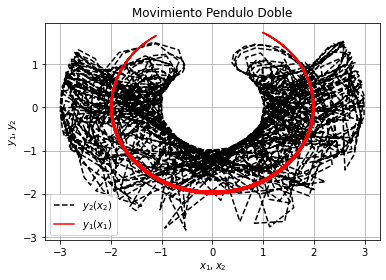

In [ ]:
plt.plot(x2,y2,'k--',label=r'$y_2(x_2)$')
plt.plot(x1,y1,'r',label=r'$y_1(x_1)$')
plt.title('Movimiento Pendulo Doble')
plt.xlabel(r'$x_1,x_2$')
plt.ylabel(r'$y_1,y_2$')
plt.legend()
plt.grid()
plt.show()

Procedemos a realizar la animacion 

In [ ]:
l = L1 + L2
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(autoscale_on=False, xlim=(-3.5, 3.5), ylim=(-l, 2))
ax.set_aspect('equal')
ax.grid()


line, = ax.plot([], [], 'ro-', lw=2)
trace, = ax.plot([], [], 'k.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
history_x, history_y = deque(maxlen=500), deque(maxlen=500)

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]
    
    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(thisx[2])
    history_y.appendleft(thisy[2])

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*0.1))
    return line, trace, time_text

ani = animation.FuncAnimation(
    fig, animate, frames=1000, interval=50, blit=True)
ani.save('pen.gif',writer='pillow',fps=25)
plt.title('Movimiento Pendulo Doble')
plt.xlabel(r'$x_1,x_2$')
plt.ylabel(r'$y_1,y_2$')
plt.show()

In [ ]:
Image(open('pen.gif','rb').read()) #Abrir la aminación del movimiento del pendulo doble

Referencias 


*   colaboradores de Wikipedia. (2022, 18 enero). Péndulo doble. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/P%C3%A9ndulo_doble

*   The double pendulum problem — Matplotlib 3.5.1 documentation. (s. f.). matplotlib. https://matplotlib.org/stable/gallery/animation/double_pendulum.html

